# NMR Assisted MS Metabolite Identification

Author: Olatomiwa Bifarin<br>
Department of Biochemistry and Molecular Biology<br>
University of Georgia<br>
Edison Lab<br>

Last edited: 09APR2020

_This is a static version of a Jupyter notebook, and work (documentation) is still in progress_ 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import scipy
#For Seaborn plots
import seaborn as sns; sns.set(style='white')
#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

# Set seaborn figure labels to 'talk', to be more visible. 
sns.set_context('talk', font_scale=0.8)

## 1. Import and Set up all (MS) features with < 0.05 _q_-values. 

_Import all 472 features_

In [2]:
qfeatures = pd.read_excel('RCC_472features.xlsx')
#qfeatures.head()

_Import all MS features_

In [3]:
dfMS = pd.read_excel('data/RCC_S280_combinedData_7097.xlsx')
dfMS_trans = dfMS.T # Transpose dataframe
IDs = np.arange(1, dfMS_trans.shape[1] + 1) # Generate a range of numbers (7098) to replace nan values in the name row
IDs = pd.Series(IDs) # creating series 
dfMS_trans.iloc[4] = dfMS_trans.iloc[4].fillna(IDs) # replace nan with the IDs, and replace the name row

In [4]:
MS = dfMS_trans.drop(['Mode', 'Molecular Weight', 'Name', 'RT [min]', 'Formula'])
MS.index.name = 'MS_ID'
MS.reset_index(inplace=True) # Converts the row names into a column.
header = MS.iloc[0] # Create a new variable called 'header' from the first row of the dataset
MS = MS[1:] # Replace the dataframe with a new one which does not contain the first row
MS.rename(columns = header, inplace=True)# Rename the dataframe's column values with the header variable
MS.rename(columns={'ID':'Sample ID'}, inplace = True) # Rename column name
# To rest the row index to start from 0
MS.index = MS.index - 1 
#MS.head()

_Import dataframe containing clinical ID_

In [5]:
path = "data/Sample_List_MS.xlsx"
fields = \
[
    'Sample ID',
    'Patient ID'
]

MSpatid = pd.read_excel(path)[fields]
#MSpatid.head()

`MSData` is the dataframe for the MS Peak Intensities with <mark>Patient ID</mark> and <mark>Groups</mark>

In [6]:
MSData = pd.merge(MS, MSpatid, on='Sample ID') # Merge the two dataframe on Sample ID
#MSData.head()

In [7]:
lst = [qfeatures['ID'].tolist(), ['Patient ID']] # create a list of list. 
flat_list = [item for sublist in lst for item in sublist] # flatten out the list
len(flat_list)

473

In [8]:
MS_qfeatures = MSData.filter(flat_list)
#MS_qfeatures.head()

In [9]:
MS_qfeatures.shape

(280, 473)

## 2. Import and Setup all NMR features. 

In [10]:
dfNMR = pd.read_excel('data/binned_NMRfeatures_22JAN2020.xlsx')
#dfNMR.head()

In [11]:
dfNMR.columns

Index(['Run_ID', 'Patient ID', 'Collection', 'Gender', 'Race', 'BMI', 'Smoker',
       'Age', 'Sample_description', 'Groups', 'Yvec', 'Run_IDOrig', 'unk1',
       'unk2', 'bile_acid1', 'bile_acid2', 'HIVA', 'lactate', 'unk3',
       'acetate', 'acetone', 'unk4', 'acetoacetate', 'unk5', 'pyruvate',
       'citrate', 'DMA', 'unk6', 'methylguanidine', 'unk7', 'choline',
       'scylloinositol', 'taurine', 'acetoacetate_4HPA', 'glycine',
       'mannitol_1', 'mannitol_2', 'creatine', 'glycolate',
       'hippurate_hydroxyhippurate', 'Tatrate', 'unk8', 'unk9', 'fumarate',
       '4HPA', 'hippurate_2', 'hippurate_3', 'aminohippurate',
       'indoxylsulfate', 'hippurate_4', 'hypoxanthine_1', 'hypoxanthine_2',
       'formate', 'unk10', 'Trigonelline_1', 'Trigonellinamide_1',
       'Trigonellinamide_2', 'Trigonelline_2', 'Trigonellinamide_3', 'unk11'],
      dtype='object')

In [12]:
dfNMR = pd.read_excel('data/binned_NMRfeatures_22JAN2020.xlsx')
dfNMR.drop(['Run_ID', 'Collection', 'Gender', 
            'Race', 'BMI', 'Smoker', 'Age', 'Sample_description', 
            'Groups', 'Yvec', 'Run_IDOrig',], axis=1, inplace=True)
#dfNMR.head()

In [13]:
dfNMR.rename(columns={'Sample_ID':'Patient ID'}, inplace = True) # Rename column name
#dfNMR.head()

## 3. Select Samples Common to both MS and NMR

In [14]:
print(dfNMR.shape)
print(MS_qfeatures.shape)

(284, 49)
(280, 473)


_Merge NMR and MS dataframes  on Patient ID_

In [15]:
combined = pd.merge(MS_qfeatures, dfNMR, on='Patient ID') # Merge the two dataframe on Sample ID
combined.shape

(256, 521)

_Select Samples Common to both MS and NMR_

In [259]:
final_NMR = dfNMR[dfNMR['Patient ID'].isin(combined['Patient ID'])]
final_MS = MS_qfeatures[MS_qfeatures['Patient ID'].isin(combined['Patient ID'])]
print(final_NMR.shape)
print(final_MS.shape)

(256, 49)
(256, 473)


## 3. NMR Unknown Identification

In [18]:
dfNMR.columns

Index(['Patient ID', 'unk1', 'unk2', 'bile_acid1', 'bile_acid2', 'HIVA',
       'lactate', 'unk3', 'acetate', 'acetone', 'unk4', 'acetoacetate', 'unk5',
       'pyruvate', 'citrate', 'DMA', 'unk6', 'methylguanidine', 'unk7',
       'choline', 'scylloinositol', 'taurine', 'acetoacetate_4HPA', 'glycine',
       'mannitol_1', 'mannitol_2', 'creatine', 'glycolate',
       'hippurate_hydroxyhippurate', 'Tatrate', 'unk8', 'unk9', 'fumarate',
       '4HPA', 'hippurate_2', 'hippurate_3', 'aminohippurate',
       'indoxylsulfate', 'hippurate_4', 'hypoxanthine_1', 'hypoxanthine_2',
       'formate', 'unk10', 'Trigonelline_1', 'Trigonellinamide_1',
       'Trigonellinamide_2', 'Trigonelline_2', 'Trigonellinamide_3', 'unk11'],
      dtype='object')

**unknown correlations**

In [36]:
NMRunknowns = dfNMR.filter(['unk1', 'unk2', 'unk3', 'unk4',
                            'unk5', 'unk6', 'unk7', 'unk8', 
                            'unk9', 'unk10', 'unk11']).corr()

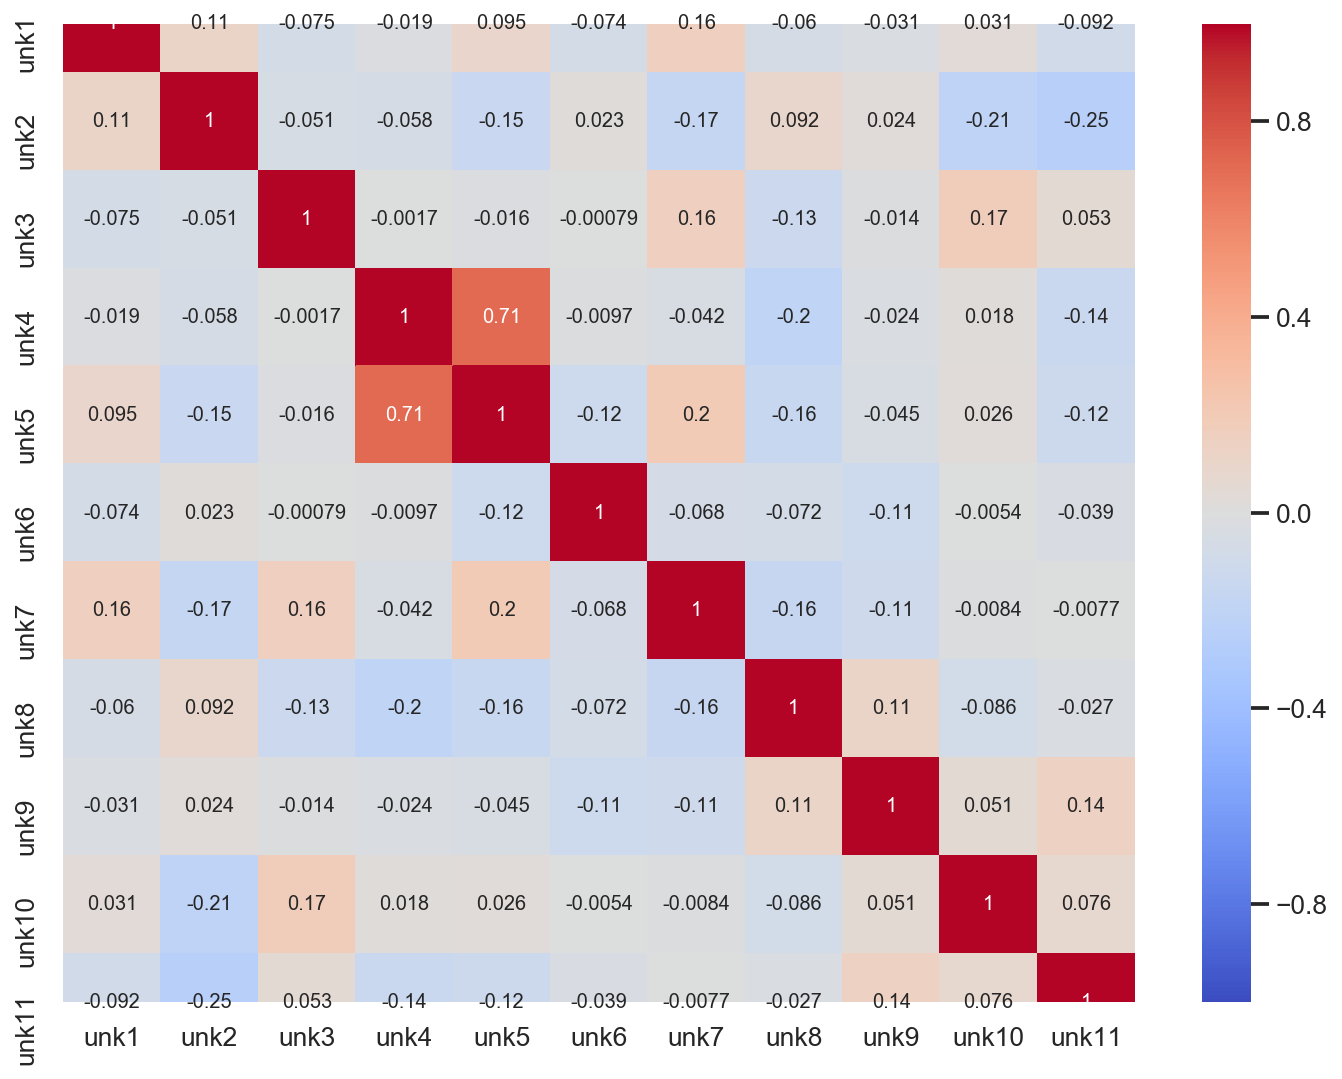

In [39]:
plt.figure(figsize = (12, 9))
sns.heatmap(NMRunknowns, xticklabels=NMRunknowns.columns, vmin=-1, vmax=1,
            yticklabels=NMRunknowns.columns, cmap='coolwarm', annot=True);

unknown 4 and unknown 5 are highly correlated.

**unknown + known correlations**

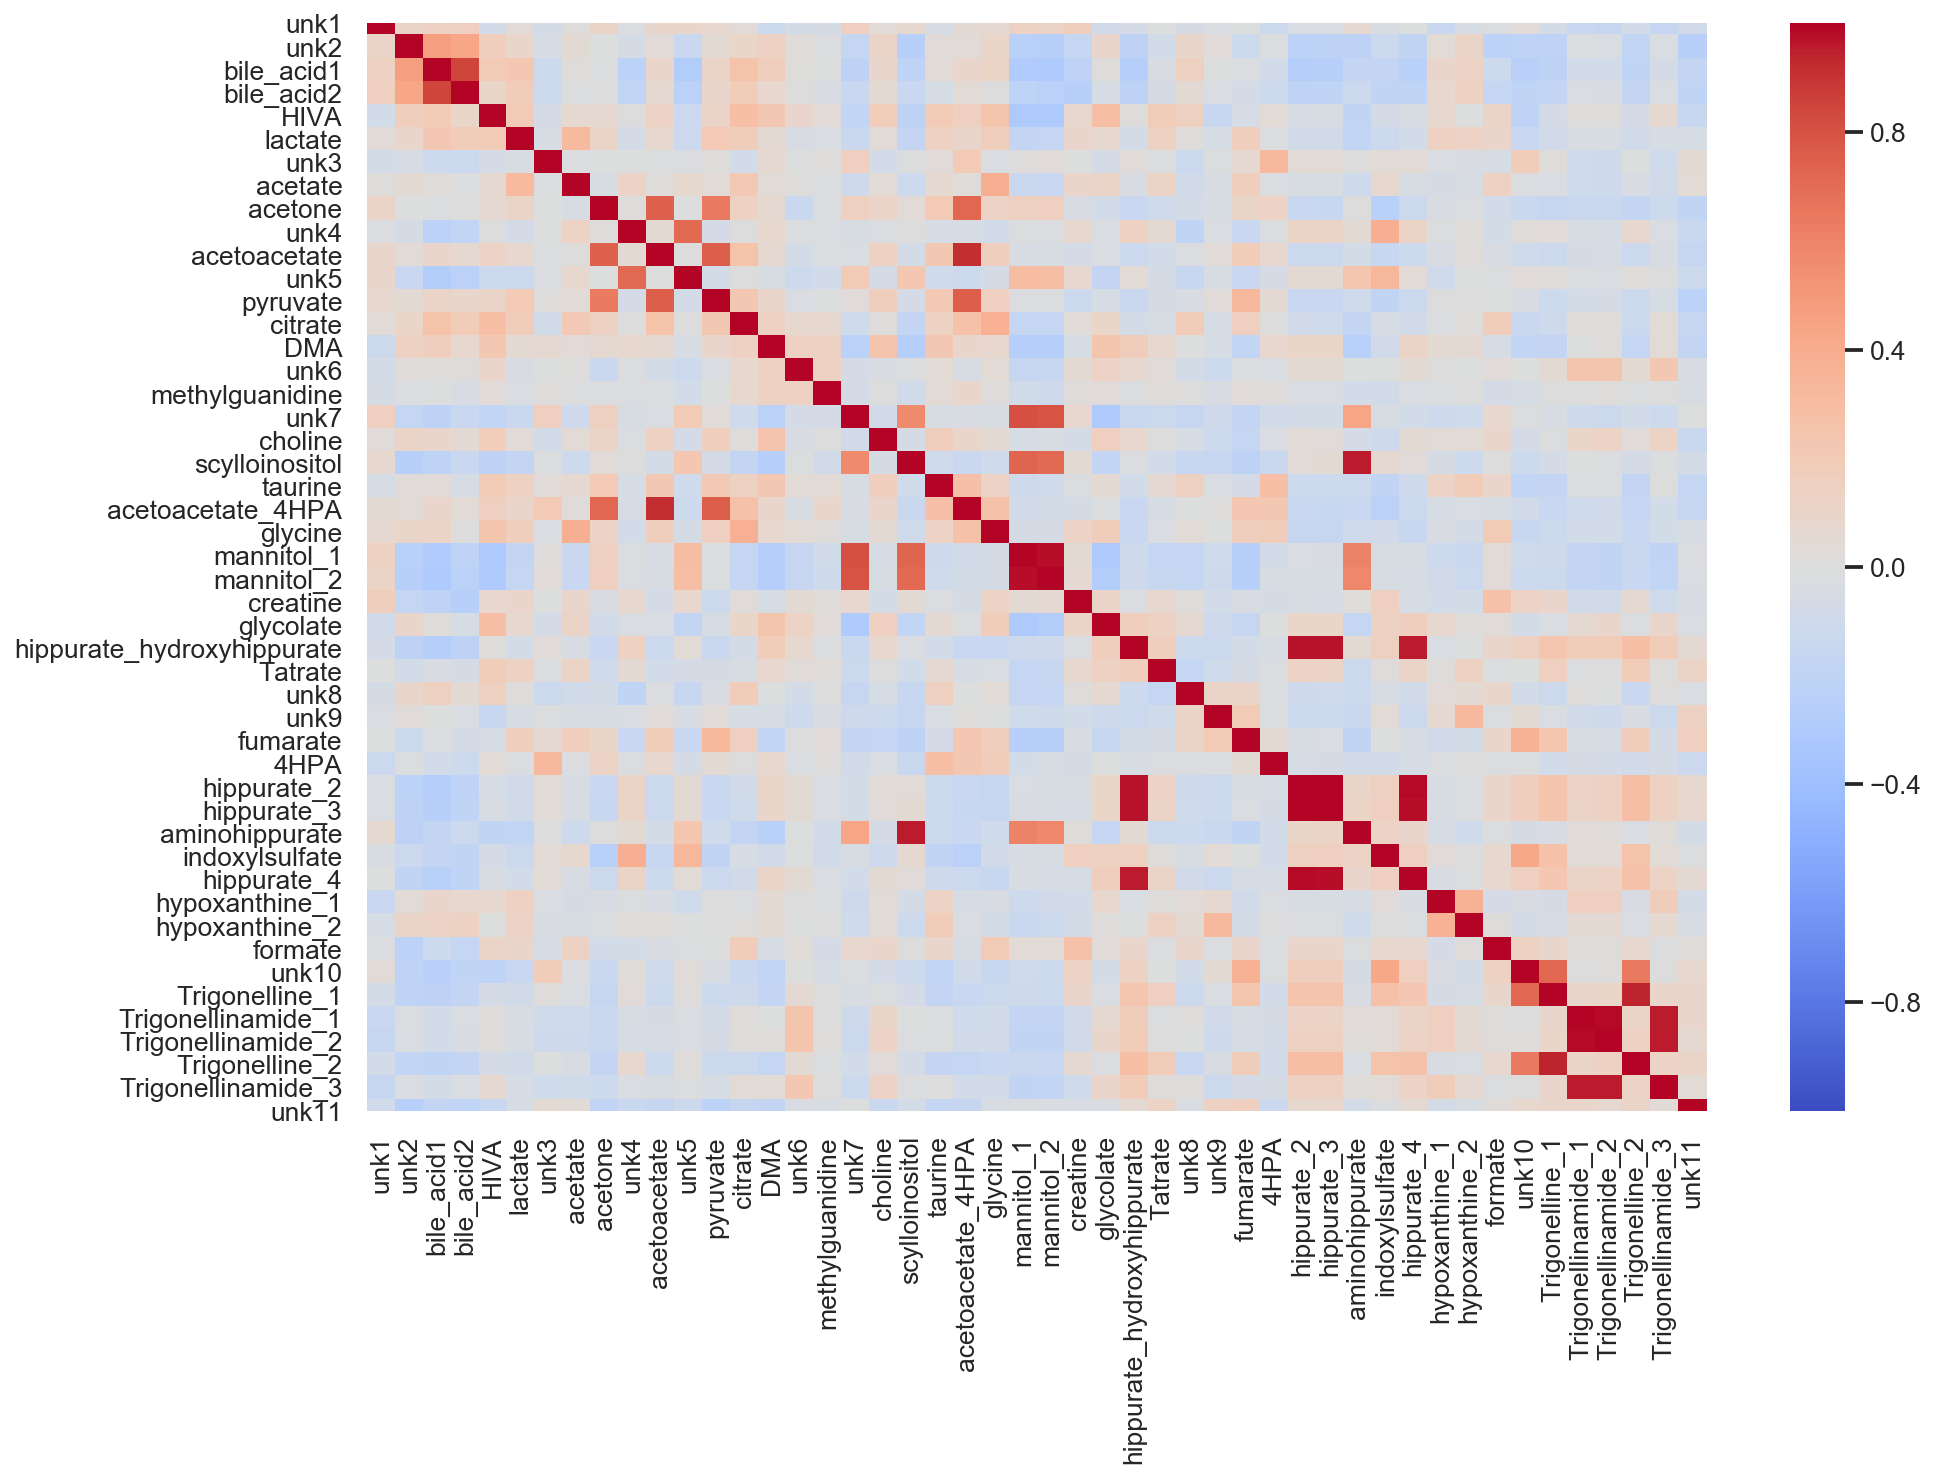

In [43]:
plt.figure(figsize= (15, 10))
dfNMR_corr = dfNMR.drop(['Patient ID'], axis=1).corr()
sns.heatmap(dfNMR_corr, xticklabels=dfNMR_corr.columns, vmin=-1, vmax=1,
            yticklabels=dfNMR_corr.columns, cmap='coolwarm', annot=False);

write a function to detect what unknown NMR features are highly correlated to.

## 4. MS-NMR Correlations

In [260]:
final_NMR.drop(['Patient ID'], axis=1, inplace=True)
final_MS.drop(['Patient ID'], axis=1, inplace=True)

In [261]:
NMRcorr_compd, MScorr_compd, corr = [], [], []
for column2 in final_MS.columns:
    for column in final_NMR.columns: 
        col_corr = pd.DataFrame(np.corrcoef(final_MS[column2].astype(float),
                                           final_NMR[column].astype(float))).abs()
        # Select upper triangle of correlation matrix
        #corr = col_corr.where(np.triu(np.ones(col_corr.shape), k=1).astype(np.bool))
        if col_corr[1][0] >= 0.25: 
                #column to drop NMR's; column2 to drop MS's 
                MScorr_compd.append(column2)
                NMRcorr_compd.append(column)
                corr.append(col_corr[1][0])

In [262]:
corr_result = pd.DataFrame(
    {'NMR_Features': NMRcorr_compd,
     'ID': MScorr_compd,
     'correlation': corr
    })
corr_result.head()

,NMR_Features,ID,correlation
0,Tatrate,147,0.331859
1,glycine,278,0.287521
2,4HPA,278,0.430818
3,pyruvate,332,0.255979
4,aminohippurate,474,0.301086


In [263]:
# Import MS_labels
MS_labels = pd.read_excel('data/MS_labels.xlsx')
# Check for potential MS ID.
MSlabels_corr = MS_labels[MS_labels.ID.isin(MScorr_compd)]
MSlabels_corr;

In [264]:
NMR_MW = pd.read_excel('data/NMR_Metabolites_MW.xlsx')
NMR_MW.head();

In [265]:
# merge the NMR and MS correlation results with NMR metabolites molecular weight
merge1 = pd.merge(corr_result, NMR_MW, on='NMR_Features')
merge1.head();

In [266]:
# merge the previous dataframe with the MS labels information
excel = pd.merge(merge1, MSlabels_corr, on='ID')
excel.head();

In [267]:
# filter ID and MS molecular weight from MS metabolomics platform
dfMS.filter(['ID','Molecular Weight']);
# merge previous dataframe with molecular weight of MS 
table = pd.merge(excel, dfMS.filter(['ID','Molecular Weight']), on='ID')
# reorder columns
column_names = ['NMR_Features', 'ID', 'Name', 'correlation', 'NMR_MW', 
                'Molecular Weight', 'Formula', 'Mode', 'RT [min]']
table = table.reindex(columns=column_names)
# rename columns
table2 = table.rename(columns={"NMR_Features": "NMR metabolites", "ID": "MS ID",
                     "Name": "MS Tentative ID", "correlation": "correlation",
                     "NMR_MW": "NMR molecular weight", "Molecular Weight": "MS molecular weight",
                     "Formula": "MS Formula"})
table2

,NMR metabolites,MS ID,MS Tentative ID,correlation,NMR molecular weight,MS molecular weight,MS Formula,Mode,RT [min]
0,Tatrate,147,147,0.331859,150.09,609.24213,C33 H41 N O6 P2,positive,2.580
1,glycine,278,278,0.287521,75.07,219.05665,NaN,positive,3.057
2,4HPA,278,278,0.430818,152.15,219.05665,NaN,positive,3.057
3,glycine,5065,5065,0.269843,75.07,427.01281,C11 H15 Cl N5 O7 P S,negative,0.855
4,glycine,6385,6385,0.267531,75.07,178.02901,C8 H7 N2 O P,negative,2.655
5,4HPA,6385,6385,0.524409,152.15,178.02901,C8 H7 N2 O P,negative,2.655
6,glycine,7016,7016,0.253172,75.07,365.13226,C15 H19 N5 O6,negative,2.414
7,pyruvate,332,N-(3-Amino-4-methyl-5-nitrophenyl)acetamide,0.255979,87.05,209.07998,C9 H11 N3 O3,positive,1.591
8,aminohippurate,474,474,0.301086,194.19,123.04259,NaN,positive,1.917
9,aminohippurate,3968,3968,0.263990,194.19,578.36464,C24 H51 N8 O6 P,positive,4.566


**Select the subset with 'equivalent' molecular weight: Incomplete**

In [268]:
print(table2.shape)
# drop row with nan in NMR_MW
table3 = table2.dropna(subset = ['NMR molecular weight'])
print(table3.shape)

(37, 9)
(30, 9)


In [269]:
lst = [] # define a list

for iden in table3['MS ID']:
    nmr = table3[table3['MS ID']==iden]['NMR molecular weight'].values[0]
    ms = table3[table3['MS ID']==iden]['MS molecular weight'].values[0]
    if abs(nmr-ms) > 5: 
        pass
    else: 
        if iden in lst:
            pass
        else: 
            lst.append(iden)    
lst;

In [270]:
list(set(lst))

[]

In [271]:
table3.loc[table['ID'].isin(list(set(lst)))]

,NMR metabolites,MS ID,MS Tentative ID,correlation,NMR molecular weight,MS molecular weight,MS Formula,Mode,RT [min]


In [129]:
nmr = table[table['ID']==147]['NMR_MW'].values[0]
ms = table[table['ID']==147]['Molecular Weight'].values[0]
abs(nmr-ms)
if abs(nmr-ms) >= 5: 
    print ("Fahgettaboudit")

Fahgettaboudit


**how many of these MS features are part of the final biomarkers?**

In [236]:
biomarker = [720, 1481, 2102, 3141, 3675, 3804, 3872, 4080, 6261, 6262]
current_target = list(set(table3['MS ID']))
# intersection between the two list = how many of these MS features are part of the final biomarkers?
list(set(biomarker) & set(current_target))

[3141]

**NMR Chemical Information**

In [51]:
MetaboliteQuants = pd.read_excel('data/MetaboliteQuants_01JUL2019.xlsx')
MetaboliteQuants

,Metabolite,Chemical Shift Range (ppm),Confidence Score
0,Hippurate,"7.567, 7.524",4
1,Trigonelline,"9.133,9.09",3
2,Tatrate,"4.34,4.329",3H
3,Mannitol,"3.867,3.847",4
4,Trigonellinamide,"8.981, 8.942",2
5,Hypoxanthine,"8.211, 8.193",3
6,Acetoacetate,"2.28, 2.266",3
7,Acetate,"1.919, 1.908",3H
8,Acetone,"2.231,2.221",3H
9,Dimethylamine (DMA),"2.72, 2.706",3H


## Function: for MS features in the same metabolic pathways.

_[extract column value based on another column pandas dataframe](https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe)_

In [ ]:
for feat in corr_result['NMR_Features']:
    for feat2 in corr_result['NMR_Features']:
        if feat = feat2: 
            corr_result.loc[corr_result['NMR_Features'] == feat, 
                            'MS_features'].iloc[0]
    
    
    

In [139]:
l = ["a","b","b"]
l.count("a")
l.count("b")

2

In [151]:
metab, metab_counter = [], []
for feat in corr_result['NMR_Features']:
    metab.append(feat)
    metab_counter.append(list(corr_result['NMR_Features']).count(feat))

In [152]:
metab

['unk1',
 'Tatrate',
 'unk8',
 'fumarate',
 '4HPA',
 '4HPA',
 'aminohippurate',
 'indoxylsulfate',
 'hypoxanthine_1',
 'hypoxanthine_2',
 'formate',
 'formate']

In [153]:
metab_counter

[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2]

In [147]:
table = pd.DataFrame(
    {'Name': metab,
     'Occurence': metab_counter
    })
table

,Name,Occurence
0,unk1,1
1,Tatrate,1
2,unk8,1
3,fumarate,1
4,4HPA,2
5,4HPA,2
6,aminohippurate,1
7,indoxylsulfate,1
8,hypoxanthine_1,1
9,hypoxanthine_2,1


In [115]:
# Import MS_labels
MS_labels = pd.read_excel('data/MS_labels.xlsx')
# Check for potential MS ID.
MSlabels_corr = MS_labels[MS_labels.ID.isin(MScorr_compd)]
MSlabels_corr

,ID,Mode,RT [min],Name,Formula
146,147,positive,2.580,147,C33 H41 N O6 P2
277,278,positive,3.057,278,NaN
473,474,positive,1.917,474,NaN
671,672,positive,2.660,Moxaverine,C20 H21 N O2
925,926,positive,2.250,926,C13 H29 N10 O5 P
994,995,positive,0.882,995,NaN
1770,1771,positive,3.001,1771,C13 H24 N4 O4
1990,1991,positive,3.247,1991,NaN
3170,3171,positive,1.131,3171,C12 H17 O2 P S
5462,5463,negative,3.758,N-Acetyl-L-methionine,C7 H13 N O3 S
